## ⚡ Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Nov 25 17:22:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install YOLO-NAS


In [ ]:
!pip install -q git+https://github.com/Deci-AI/super-gradients.git@stable
!pip install -q roboflow
!pip install -q supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.3 MB/s eta 0:00:00
  Installing bu

### 🚨 Restart the runtime

**After installation is complete, you'll need to restart the runtime after installation completes. Navigate to `Runtime` -> `Restart runtime` and confirm by clicking `Yes` when you see the popup.**

After that, carry on with the notebook starting from the cell below 👇

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Inference with pre-trained COCO model

Start by instantiating a pretrained model. YOLO-NAS architecture comes in three different sizes: `yolo_nas_s`, `yolo_nas_m`, `and yolo_nas_l`. We will use `yolo_nas_l` throughout this notebook. Keep in mind that depending on your use-case your decision may be different. Take a peek at the diagram below visualizing the speed-accuracy tradeoff.

<br>

![YOLO-NAS](https://raw.githubusercontent.com/Deci-AI/super-gradients/master/documentation/source/images/yolo_nas_frontier.png)


In [ ]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
MODEL_ARCH = 'yolo_nas_l'

In [ ]:
from super_gradients.training import models

model = models.get(MODEL_ARCH, pretrained_weights="coco").to(DEVICE)

The console stream is logged into /root/sg_logs/console.log


[2023-11-25 17:24:45] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-25 17:24:45] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-25 17:24:45] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-25 17:24:54] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-25 17:24:54] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-25 17:24:54] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-25 17:24:55] INFO - env_sanity_check.py - Library check is not supported when super_gradients installed through "git+https://github.com/..." command
[2023-11-25 17:24:57] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading t

### Use Example Data (Below, We'll Prepare Our Own Custom Dataset)

Let's download few example images. Feel free to replace my images with yours. All you have to do is upload them to the `{HOME}/data` directory. If you're looking for data, take a peek at [Roboflow Universe](https://universe.roboflow.com/)! You're sure to find something interesting.

In [ ]:
f"{HOME}/data"

'/content/data'

### Single Image Inference

### Visualize Inference Result

As with other models, you can use Supervision to visualize your results. You can read more about the integration between Supervision and YOLO-NAS [here](https://roboflow.github.io/supervision/detection/core/#supervision.detection.core.Detections.from_yolo_nas), and about visualizing detection [here](https://roboflow.github.io/supervision/detection/annotate/#supervision.detection.annotate.BoxAnnotator.annotate).

In [ ]:
%cd {HOME}

import roboflow
from roboflow import Roboflow


rf = Roboflow(api_key="nSvqzT0yk6XSyk8k9CZO")
project = rf.workspace("the-trio").project("drowsiness-detection-wzoqe")
dataset = project.version(2).download("yolov5")

/content
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Drowsiness-Detection-2 in yolov5pytorch::  30%|██▉       | 710/2384 [00:00<00:00, 7097.91it/s]

In [ ]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

## Fine-tune on custom dataset

`ckpt_root_dir` - this is the directory where results from all your experiments will be saved

`experiment_name` - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here.

In [ ]:
MODEL_ARCH = 'yolo_nas_l'
BATCH_SIZE = 8
MAX_EPOCHS = 15
CHECKPOINT_DIR = f'{HOME}/checkpoints'
EXPERIMENT_NAME = project.name.lower().replace(" ", "_")

In [ ]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [ ]:
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2023-11-25 18:23:52] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 1020/1020 [00:00<00:00, 1684.05it/s]
[2023-11-25 18:23:53] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 83/83 [00:00<00:00, 1613.25it/s]
[2023-11-25 18:23:53] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 83/83 [00:00<00:00, 5013.43it/s]


**NOTE:** Let's inspect our dataset

In [ ]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

### Instantiate the model

In [ ]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2023-11-25 18:23:59] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-25 18:24:00] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


### Define metrics and training parameters

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

### Train the model

In [ ]:
trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)

[2023-11-26 00:07:27] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231126_000727_195500`
[2023-11-26 00:07:27] INFO - sg_trainer.py - Checkpoints directory: /content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500
[2023-11-26 00:07:27] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to /content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500/console_Nov26_00_07_27.txt


[2023-11-26 00:07:29] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            1020       (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         127        (len(train_loader))
    - Gradient updates per epoch:   127        (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_L  (66.91M parameters, 66.91M optimized)
    - Learning Rates and Weight Decays:
      - default: (66.91M parameters). LR: 0.0005 (66.91M parameters) WD: 0.0, (84.69K parameters), WD: 0.0001, (66.82M parameters)

[2023-11-26 00:07:29] INFO - sg_trainer.py - Started training for 1

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.5267
│   ├── Ppyoloeloss/loss_iou = 0.4772
│   ├── Ppyoloeloss/loss_dfl = 0.7273
│   └── Ppyoloeloss/loss = 3.7313
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.4161
    ├── Ppyoloeloss/loss_iou = 0.422
    ├── Ppyoloeloss/loss_dfl = 0.8095
    ├── Ppyoloeloss/loss = 3.6475
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.001
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]
[2023-11-26 00:11:38] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500/ckpt_best.pth
[2023-11-26 00:11:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9565597176551819


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1107
│   │   ├── Epoch N-1      = 2.5267 (↘ -1.416)
│   │   └── Best until now = 2.5267 (↘ -1.416)
│   ├── Ppyoloeloss/loss_iou = 0.3547
│   │   ├── Epoch N-1      = 0.4772 (↘ -0.1225)
│   │   └── Best until now = 0.4772 (↘ -0.1225)
│   ├── Ppyoloeloss/loss_dfl = 0.6197
│   │   ├── Epoch N-1      = 0.7273 (↘ -0.1076)
│   │   └── Best until now = 0.7273 (↘ -0.1076)
│   └── Ppyoloeloss/loss = 2.0851
│       ├── Epoch N-1      = 3.7313 (↘ -1.6461)
│       └── Best until now = 3.7313 (↘ -1.6461)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9855
    │   ├── Epoch N-1      = 2.4161 (↘ -1.4306)
    │   └── Best until now = 2.4161 (↘ -1.4306)
    ├── Ppyoloeloss/loss_iou = 0.2998
    │   ├── Epoch N-1      = 0.422  (↘ -0.1221)
    │   └── Best until now = 0.422  (↘ -0.1221)
    ├── Ppyoloeloss/loss_dfl = 0.7128
    │   ├── Epoch N-1      = 0.8095 (↘ -0.0966)
    │   └── Best until now = 0.8095 (↘ -0.0966)
    ├── Ppyoloeloss/loss

Validating epoch 2: 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0097
│   │   ├── Epoch N-1      = 1.1107 (↘ -0.101)
│   │   └── Best until now = 1.1107 (↘ -0.101)
│   ├── Ppyoloeloss/loss_iou = 0.3512
│   │   ├── Epoch N-1      = 0.3547 (↘ -0.0035)
│   │   └── Best until now = 0.3547 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_dfl = 0.6056
│   │   ├── Epoch N-1      = 0.6197 (↘ -0.0142)
│   │   └── Best until now = 0.6197 (↘ -0.0142)
│   └── Ppyoloeloss/loss = 1.9665
│       ├── Epoch N-1      = 2.0851 (↘ -0.1187)
│       └── Best until now = 2.0851 (↘ -0.1187)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0682
    │   ├── Epoch N-1      = 0.9855 (↗ 0.0828)
    │   └── Best until now = 0.9855 (↗ 0.0828)
    ├── Ppyoloeloss/loss_iou = 0.3241
    │   ├── Epoch N-1      = 0.2998 (↗ 0.0242)
    │   └── Best until now = 0.2998 (↗ 0.0242)
    ├── Ppyoloeloss/loss_dfl = 0.7225
    │   ├── Epoch N-1      = 0.7128 (↗ 0.0097)
    │   └── Best until now = 0.7128 (↗ 0.0097)
    ├── Ppyoloeloss/loss = 2.1

Validating epoch 3: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9969
│   │   ├── Epoch N-1      = 1.0097 (↘ -0.0128)
│   │   └── Best until now = 1.0097 (↘ -0.0128)
│   ├── Ppyoloeloss/loss_iou = 0.3448
│   │   ├── Epoch N-1      = 0.3512 (↘ -0.0064)
│   │   └── Best until now = 0.3512 (↘ -0.0064)
│   ├── Ppyoloeloss/loss_dfl = 0.5992
│   │   ├── Epoch N-1      = 0.6056 (↘ -0.0063)
│   │   └── Best until now = 0.6056 (↘ -0.0063)
│   └── Ppyoloeloss/loss = 1.941
│       ├── Epoch N-1      = 1.9665 (↘ -0.0255)
│       └── Best until now = 1.9665 (↘ -0.0255)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8813
    │   ├── Epoch N-1      = 1.0682 (↘ -0.1869)
    │   └── Best until now = 0.9855 (↘ -0.1042)
    ├── Ppyoloeloss/loss_iou = 0.3062
    │   ├── Epoch N-1      = 0.3241 (↘ -0.0179)
    │   └── Best until now = 0.2998 (↗ 0.0063)
    ├── Ppyoloeloss/loss_dfl = 0.7283
    │   ├── Epoch N-1      = 0.7225 (↗ 0.0058)
    │   └── Best until now = 0.7128 (↗ 0.0154)
    ├── Ppyoloeloss/loss =

Validating epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.26it/s]
[2023-11-26 00:17:33] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500/ckpt_best.pth
[2023-11-26 00:17:33] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9951813220977783


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9474
│   │   ├── Epoch N-1      = 0.9969 (↘ -0.0495)
│   │   └── Best until now = 0.9969 (↘ -0.0495)
│   ├── Ppyoloeloss/loss_iou = 0.318
│   │   ├── Epoch N-1      = 0.3448 (↘ -0.0269)
│   │   └── Best until now = 0.3448 (↘ -0.0269)
│   ├── Ppyoloeloss/loss_dfl = 0.5751
│   │   ├── Epoch N-1      = 0.5992 (↘ -0.0241)
│   │   └── Best until now = 0.5992 (↘ -0.0241)
│   └── Ppyoloeloss/loss = 1.8405
│       ├── Epoch N-1      = 1.941  (↘ -0.1005)
│       └── Best until now = 1.941  (↘ -0.1005)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7142
    │   ├── Epoch N-1      = 0.8813 (↘ -0.1671)
    │   └── Best until now = 0.8813 (↘ -0.1671)
    ├── Ppyoloeloss/loss_iou = 0.3169
    │   ├── Epoch N-1      = 0.3062 (↗ 0.0107)
    │   └── Best until now = 0.2998 (↗ 0.017)
    ├── Ppyoloeloss/loss_dfl = 0.725
    │   ├── Epoch N-1      = 0.7283 (↘ -0.0033)
    │   └── Best until now = 0.7128 (↗ 0.0121)
    ├── Ppyoloeloss/loss = 1

Validating epoch 5: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8974
│   │   ├── Epoch N-1      = 0.9474 (↘ -0.05)
│   │   └── Best until now = 0.9474 (↘ -0.05)
│   ├── Ppyoloeloss/loss_iou = 0.3084
│   │   ├── Epoch N-1      = 0.318  (↘ -0.0096)
│   │   └── Best until now = 0.318  (↘ -0.0096)
│   ├── Ppyoloeloss/loss_dfl = 0.5611
│   │   ├── Epoch N-1      = 0.5751 (↘ -0.014)
│   │   └── Best until now = 0.5751 (↘ -0.014)
│   └── Ppyoloeloss/loss = 1.7668
│       ├── Epoch N-1      = 1.8405 (↘ -0.0737)
│       └── Best until now = 1.8405 (↘ -0.0737)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.777
    │   ├── Epoch N-1      = 0.7142 (↗ 0.0628)
    │   └── Best until now = 0.7142 (↗ 0.0628)
    ├── Ppyoloeloss/loss_iou = 0.3437
    │   ├── Epoch N-1      = 0.3169 (↗ 0.0269)
    │   └── Best until now = 0.2998 (↗ 0.0439)
    ├── Ppyoloeloss/loss_dfl = 0.7979
    │   ├── Epoch N-1      = 0.725  (↗ 0.0729)
    │   └── Best until now = 0.7128 (↗ 0.0851)
    ├── Ppyoloeloss/loss = 1.9186
 

Validating epoch 6: 100%|██████████| 11/11 [00:04<00:00,  2.25it/s]


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8705
│   │   ├── Epoch N-1      = 0.8974 (↘ -0.0269)
│   │   └── Best until now = 0.8974 (↘ -0.0269)
│   ├── Ppyoloeloss/loss_iou = 0.2983
│   │   ├── Epoch N-1      = 0.3084 (↘ -0.0101)
│   │   └── Best until now = 0.3084 (↘ -0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.5506
│   │   ├── Epoch N-1      = 0.5611 (↘ -0.0104)
│   │   └── Best until now = 0.5611 (↘ -0.0104)
│   └── Ppyoloeloss/loss = 1.7194
│       ├── Epoch N-1      = 1.7668 (↘ -0.0474)
│       └── Best until now = 1.7668 (↘ -0.0474)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8418
    │   ├── Epoch N-1      = 0.777  (↗ 0.0648)
    │   └── Best until now = 0.7142 (↗ 0.1276)
    ├── Ppyoloeloss/loss_iou = 0.2964
    │   ├── Epoch N-1      = 0.3437 (↘ -0.0473)
    │   └── Best until now = 0.2998 (↘ -0.0034)
    ├── Ppyoloeloss/loss_dfl = 0.6712
    │   ├── Epoch N-1      = 0.7979 (↘ -0.1267)
    │   └── Best until now = 0.7128 (↘ -0.0417)
    ├── Ppyoloeloss/loss

Validating epoch 7: 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.847
│   │   ├── Epoch N-1      = 0.8705 (↘ -0.0235)
│   │   └── Best until now = 0.8705 (↘ -0.0235)
│   ├── Ppyoloeloss/loss_iou = 0.2872
│   │   ├── Epoch N-1      = 0.2983 (↘ -0.0111)
│   │   └── Best until now = 0.2983 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.5379
│   │   ├── Epoch N-1      = 0.5506 (↘ -0.0127)
│   │   └── Best until now = 0.5506 (↘ -0.0127)
│   └── Ppyoloeloss/loss = 1.6721
│       ├── Epoch N-1      = 1.7194 (↘ -0.0473)
│       └── Best until now = 1.7194 (↘ -0.0473)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7624
    │   ├── Epoch N-1      = 0.8418 (↘ -0.0794)
    │   └── Best until now = 0.7142 (↗ 0.0482)
    ├── Ppyoloeloss/loss_iou = 0.358
    │   ├── Epoch N-1      = 0.2964 (↗ 0.0616)
    │   └── Best until now = 0.2964 (↗ 0.0616)
    ├── Ppyoloeloss/loss_dfl = 0.814
    │   ├── Epoch N-1      = 0.6712 (↗ 0.1429)
    │   └── Best until now = 0.6712 (↗ 0.1429)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 8: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
[2023-11-26 00:26:12] INFO - base_sg_logger.py - Checkpoint saved in /content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500/ckpt_best.pth
[2023-11-26 00:26:12] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 1.0


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8312
│   │   ├── Epoch N-1      = 0.847  (↘ -0.0158)
│   │   └── Best until now = 0.847  (↘ -0.0158)
│   ├── Ppyoloeloss/loss_iou = 0.2835
│   │   ├── Epoch N-1      = 0.2872 (↘ -0.0037)
│   │   └── Best until now = 0.2872 (↘ -0.0037)
│   ├── Ppyoloeloss/loss_dfl = 0.5317
│   │   ├── Epoch N-1      = 0.5379 (↘ -0.0062)
│   │   └── Best until now = 0.5379 (↘ -0.0062)
│   └── Ppyoloeloss/loss = 1.6464
│       ├── Epoch N-1      = 1.6721 (↘ -0.0256)
│       └── Best until now = 1.6721 (↘ -0.0256)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6681
    │   ├── Epoch N-1      = 0.7624 (↘ -0.0943)
    │   └── Best until now = 0.7142 (↘ -0.0461)
    ├── Ppyoloeloss/loss_iou = 0.353
    │   ├── Epoch N-1      = 0.358  (↘ -0.005)
    │   └── Best until now = 0.2964 (↗ 0.0567)
    ├── Ppyoloeloss/loss_dfl = 0.7769
    │   ├── Epoch N-1      = 0.814  (↘ -0.0371)
    │   └── Best until now = 0.6712 (↗ 0.1058)
    ├── Ppyoloeloss/loss =

Validating epoch 9: 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.8082
│   │   ├── Epoch N-1      = 0.8312 (↘ -0.023)
│   │   └── Best until now = 0.8312 (↘ -0.023)
│   ├── Ppyoloeloss/loss_iou = 0.2739
│   │   ├── Epoch N-1      = 0.2835 (↘ -0.0097)
│   │   └── Best until now = 0.2835 (↘ -0.0097)
│   ├── Ppyoloeloss/loss_dfl = 0.519
│   │   ├── Epoch N-1      = 0.5317 (↘ -0.0127)
│   │   └── Best until now = 0.5317 (↘ -0.0127)
│   └── Ppyoloeloss/loss = 1.601
│       ├── Epoch N-1      = 1.6464 (↘ -0.0454)
│       └── Best until now = 1.6464 (↘ -0.0454)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6448
    │   ├── Epoch N-1      = 0.6681 (↘ -0.0234)
    │   └── Best until now = 0.6681 (↘ -0.0234)
    ├── Ppyoloeloss/loss_iou = 0.3618
    │   ├── Epoch N-1      = 0.353  (↗ 0.0088)
    │   └── Best until now = 0.2964 (↗ 0.0655)
    ├── Ppyoloeloss/loss_dfl = 0.7903
    │   ├── Epoch N-1      = 0.7769 (↗ 0.0134)
    │   └── Best until now = 0.6712 (↗ 0.1192)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 10: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7777
│   │   ├── Epoch N-1      = 0.8082 (↘ -0.0305)
│   │   └── Best until now = 0.8082 (↘ -0.0305)
│   ├── Ppyoloeloss/loss_iou = 0.2628
│   │   ├── Epoch N-1      = 0.2739 (↘ -0.0111)
│   │   └── Best until now = 0.2739 (↘ -0.0111)
│   ├── Ppyoloeloss/loss_dfl = 0.5136
│   │   ├── Epoch N-1      = 0.519  (↘ -0.0053)
│   │   └── Best until now = 0.519  (↘ -0.0053)
│   └── Ppyoloeloss/loss = 1.5541
│       ├── Epoch N-1      = 1.601  (↘ -0.047)
│       └── Best until now = 1.601  (↘ -0.047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6215
    │   ├── Epoch N-1      = 0.6448 (↘ -0.0233)
    │   └── Best until now = 0.6448 (↘ -0.0233)
    ├── Ppyoloeloss/loss_iou = 0.3322
    │   ├── Epoch N-1      = 0.3618 (↘ -0.0296)
    │   └── Best until now = 0.2964 (↗ 0.0358)
    ├── Ppyoloeloss/loss_dfl = 0.7229
    │   ├── Epoch N-1      = 0.7903 (↘ -0.0674)
    │   └── Best until now = 0.6712 (↗ 0.0518)
    ├── Ppyoloeloss/loss 

Validating epoch 11: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7669
│   │   ├── Epoch N-1      = 0.7777 (↘ -0.0107)
│   │   └── Best until now = 0.7777 (↘ -0.0107)
│   ├── Ppyoloeloss/loss_iou = 0.2571
│   │   ├── Epoch N-1      = 0.2628 (↘ -0.0057)
│   │   └── Best until now = 0.2628 (↘ -0.0057)
│   ├── Ppyoloeloss/loss_dfl = 0.5039
│   │   ├── Epoch N-1      = 0.5136 (↘ -0.0098)
│   │   └── Best until now = 0.5136 (↘ -0.0098)
│   └── Ppyoloeloss/loss = 1.5279
│       ├── Epoch N-1      = 1.5541 (↘ -0.0262)
│       └── Best until now = 1.5541 (↘ -0.0262)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.672
    │   ├── Epoch N-1      = 0.6215 (↗ 0.0505)
    │   └── Best until now = 0.6215 (↗ 0.0505)
    ├── Ppyoloeloss/loss_iou = 0.3579
    │   ├── Epoch N-1      = 0.3322 (↗ 0.0257)
    │   └── Best until now = 0.2964 (↗ 0.0615)
    ├── Ppyoloeloss/loss_dfl = 0.7906
    │   ├── Epoch N-1      = 0.7229 (↗ 0.0676)
    │   └── Best until now = 0.6712 (↗ 0.1194)
    ├── Ppyoloeloss/loss = 1

Validating epoch 12: 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7404
│   │   ├── Epoch N-1      = 0.7669 (↘ -0.0265)
│   │   └── Best until now = 0.7669 (↘ -0.0265)
│   ├── Ppyoloeloss/loss_iou = 0.248
│   │   ├── Epoch N-1      = 0.2571 (↘ -0.009)
│   │   └── Best until now = 0.2571 (↘ -0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.4966
│   │   ├── Epoch N-1      = 0.5039 (↘ -0.0073)
│   │   └── Best until now = 0.5039 (↘ -0.0073)
│   └── Ppyoloeloss/loss = 1.4851
│       ├── Epoch N-1      = 1.5279 (↘ -0.0428)
│       └── Best until now = 1.5279 (↘ -0.0428)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.5939
    │   ├── Epoch N-1      = 0.672  (↘ -0.0781)
    │   └── Best until now = 0.6215 (↘ -0.0276)
    ├── Ppyoloeloss/loss_iou = 0.3395
    │   ├── Epoch N-1      = 0.3579 (↘ -0.0184)
    │   └── Best until now = 0.2964 (↗ 0.0431)
    ├── Ppyoloeloss/loss_dfl = 0.7528
    │   ├── Epoch N-1      = 0.7906 (↘ -0.0378)
    │   └── Best until now = 0.6712 (↗ 0.0816)
    ├── Ppyoloeloss/loss =

Validating epoch 13: 100%|██████████| 11/11 [00:04<00:00,  2.20it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.733
│   │   ├── Epoch N-1      = 0.7404 (↘ -0.0074)
│   │   └── Best until now = 0.7404 (↘ -0.0074)
│   ├── Ppyoloeloss/loss_iou = 0.25
│   │   ├── Epoch N-1      = 0.248  (↗ 0.0019)
│   │   └── Best until now = 0.248  (↗ 0.0019)
│   ├── Ppyoloeloss/loss_dfl = 0.4967
│   │   ├── Epoch N-1      = 0.4966 (↗ 1e-04)
│   │   └── Best until now = 0.4966 (↗ 1e-04)
│   └── Ppyoloeloss/loss = 1.4796
│       ├── Epoch N-1      = 1.4851 (↘ -0.0054)
│       └── Best until now = 1.4851 (↘ -0.0054)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.6302
    │   ├── Epoch N-1      = 0.5939 (↗ 0.0363)
    │   └── Best until now = 0.5939 (↗ 0.0363)
    ├── Ppyoloeloss/loss_iou = 0.3543
    │   ├── Epoch N-1      = 0.3395 (↗ 0.0149)
    │   └── Best until now = 0.2964 (↗ 0.0579)
    ├── Ppyoloeloss/loss_dfl = 0.7626
    │   ├── Epoch N-1      = 0.7528 (↗ 0.0099)
    │   └── Best until now = 0.6712 (↗ 0.0915)
    ├── Ppyoloeloss/loss = 1.7472
  

Validating epoch 14: 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.732
│   │   ├── Epoch N-1      = 0.733  (↘ -0.001)
│   │   └── Best until now = 0.733  (↘ -0.001)
│   ├── Ppyoloeloss/loss_iou = 0.2566
│   │   ├── Epoch N-1      = 0.25   (↗ 0.0067)
│   │   └── Best until now = 0.248  (↗ 0.0086)
│   ├── Ppyoloeloss/loss_dfl = 0.5004
│   │   ├── Epoch N-1      = 0.4967 (↗ 0.0037)
│   │   └── Best until now = 0.4966 (↗ 0.0038)
│   └── Ppyoloeloss/loss = 1.4891
│       ├── Epoch N-1      = 1.4796 (↗ 0.0094)
│       └── Best until now = 1.4796 (↗ 0.0094)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.606
    │   ├── Epoch N-1      = 0.6302 (↘ -0.0242)
    │   └── Best until now = 0.5939 (↗ 0.0121)
    ├── Ppyoloeloss/loss_iou = 0.3474
    │   ├── Epoch N-1      = 0.3543 (↘ -0.0069)
    │   └── Best until now = 0.2964 (↗ 0.051)
    ├── Ppyoloeloss/loss_dfl = 0.7461
    │   ├── Epoch N-1      = 0.7626 (↘ -0.0165)
    │   └── Best until now = 0.6712 (↗ 0.0749)
    ├── Ppyoloeloss/loss = 1.6995
 

[2023-11-26 00:44:26] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 15: 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]


### Analyze training metrics


In [ ]:
%load_ext tensorboard
%tensorboard --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

<IPython.core.display.Javascript object>

[2023-11-26 00:44:32] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process
`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Zip and download fine-tuned model

In [ ]:
# if you experience 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968' error, run code below 👇

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!zip -r yolo_nas.zip {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


updating: content/checkpoints/drowsiness_detection/ (stored 0%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/ (stored 0%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/logs_Nov25_17_28_11.txt (deflated 77%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/events.out.tfevents.1700933291.d7b166e5f9c0.1189.0 (deflated 88%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/ckpt_best.pth (deflated 8%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/console_Nov25_17_28_11.txt (deflated 89%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/average_model.pth (deflated 8%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/events.out.tfevents.1700933443.d7b166e5f9c0.1189.1 (deflated 42%)
updating: content/checkpoints/drowsiness_detection/RUN_20231125_172811_800767/ckpt_latest.pth (deflated 

## Load trained model

In [ ]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"/content/checkpoints/drowsiness_detection/RUN_20231125_182740_853521/average_model.pth"
).to(DEVICE)

 (deflated 8%)
  adding: content/checkpoints/drowsiness_detection/RUN_20231126_000727_195500/logs_Nov26_00_07_27.txt (deflated 75%)


FileNotFoundError: ignored

## Evaluate trained model

In [ ]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(
            score_threshold=0.01,
            nms_top_k=1000,
            max_predictions=300,
            nms_threshold=0.7
        )
    )
)

### Inference with trained model

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml",
    force_masks=False
)

In [ ]:
import supervision as sv

CONFIDENCE_TRESHOLD = 0.5

predictions = {}

for image_name, image in ds.images.items():
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

[2023-11-25 20:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-25 20:01:02] INFO -

### Visualize inference results

In [ ]:
import random
random.seed(10)

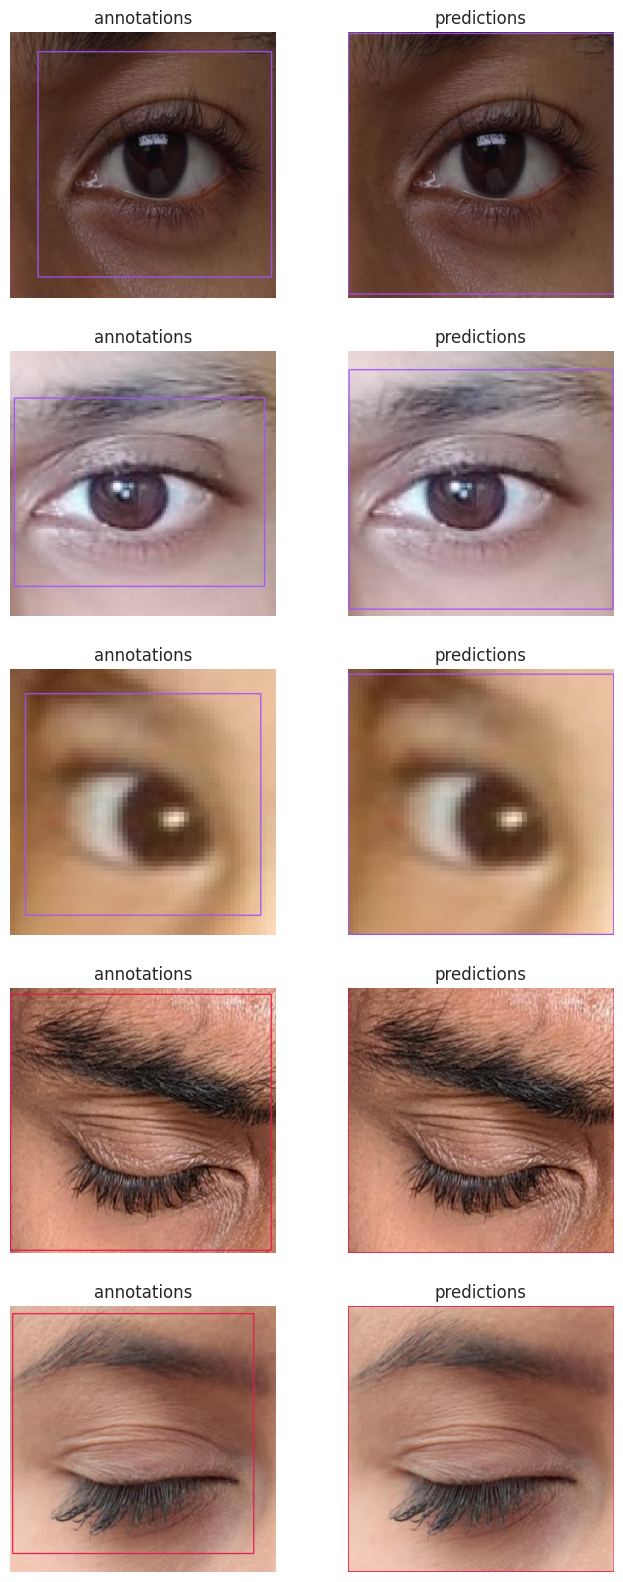

In [ ]:
import supervision as sv

MAX_IMAGE_COUNT = 5

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n)

box_annotator = sv.BoxAnnotator()

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))

### Calculate confusion matrix

In [ ]:
!pip install onemetric

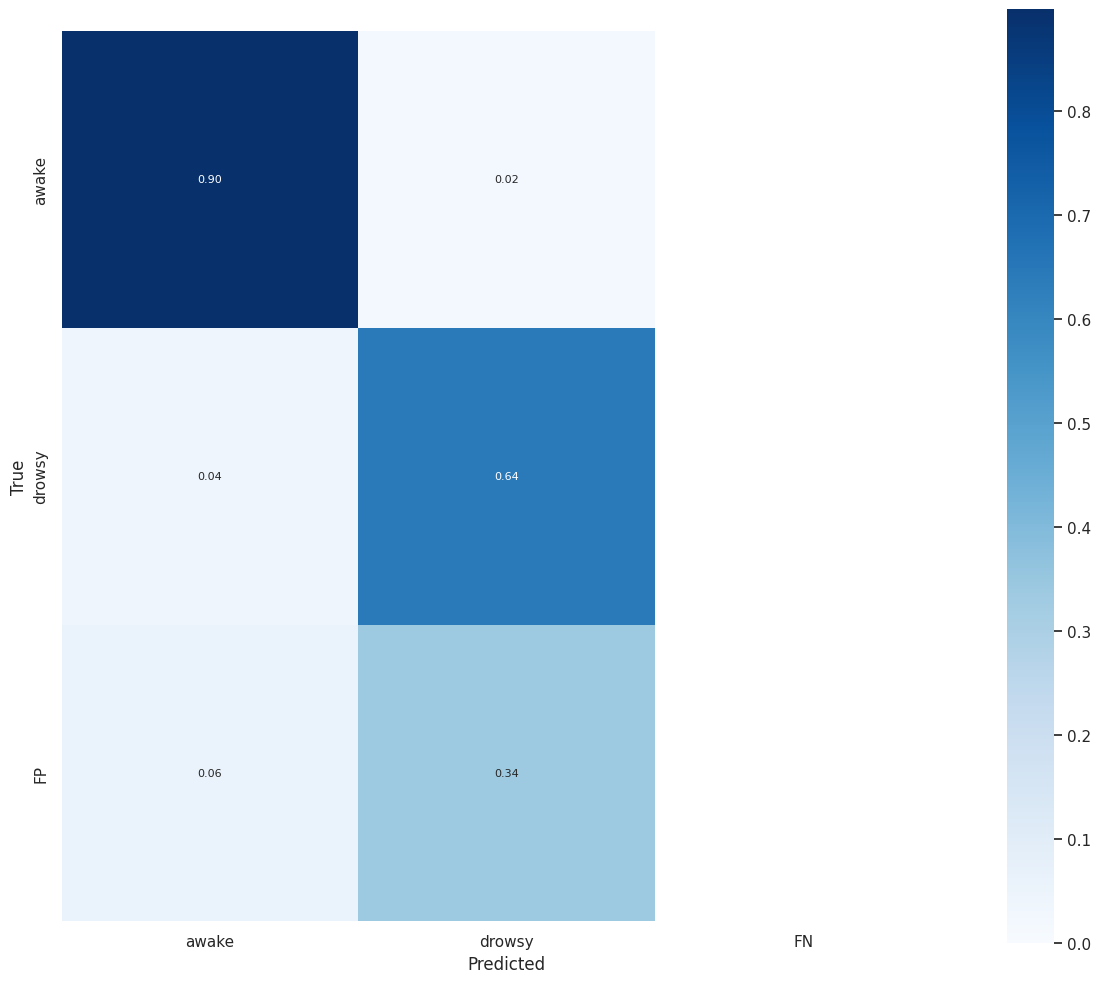

In [ ]:
import os

import numpy as np

from onemetric.cv.object_detection import ConfusionMatrix

keys = list(ds.images.keys())

annotation_batches, prediction_batches = [], []

for key in keys:
    annotation=ds.annotations[key]
    annotation_batch = np.column_stack((
        annotation.xyxy,
        annotation.class_id
    ))
    annotation_batches.append(annotation_batch)

    prediction=predictions[key]
    prediction_batch = np.column_stack((
        prediction.xyxy,
        prediction.class_id,
        prediction.confidence
    ))
    prediction_batches.append(prediction_batch)

confusion_matrix = ConfusionMatrix.from_detections(
    true_batches=annotation_batches,
    detection_batches=prediction_batches,
    num_classes=len(ds.classes),
    conf_threshold=CONFIDENCE_TRESHOLD
)

confusion_matrix.plot(os.path.join(HOME, "confusion_matrix.png"), class_names=ds.classes)